# 1. Bestimmung der Wellenlänge


Wir bestimmen zuerst die Wellenlänge eines grünen Lasers mithilfe eines Michelson Interferrometer. Dazu verwenden wir Formel (35) in der Form
\begin{equation}\lambda= 2 \frac{s_e - s_a}{m} \tag{39} \end{equation}

Tabelle 1:

| $s_a$ [mm] | $s_e$ [mm] | $m$ [A.U.] |
|------|------|-----|
|0.0000|2.9645|11089|
|3.2000|0.2400|9538 |
|0.5000|3.4590|10452|
|3.2000|0.2350|11158|
|0.1000|3.0645|11131|

Dabei verwenden wir die Werte aus Tabelle 1 und berechnen die Wellenlängen nach Formel 39

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
# Auslesen von Daten aus einer CSV die auf Github gespeichert wurde
data_1 = np.genfromtxt('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment232/Aufgabe1.csv',delimiter =";")
s_e = data_1[:,1]
s_a = data_1[:,0]
dm = data_1[:,2]
wavelength = 2*np.absolute(s_e - s_a)/dm 
print(wavelength)

[0.00053467 0.00062068 0.00056621 0.00053146 0.00053266]


Aus diesen Werten für die Wellenlängen können wir nun den Mittelwert bestimmen und dazu die Standardabweichung des Mittelwertes

In [47]:
std_wave = sp.stats.sem(wavelength, ddof = 1)
wavelength_m = np.mean(wavelength)
print("λ = " + str(wavelength_m))
print("Standardabweichung = " + str(std_wave))

λ = 0.0005571340829656047
Standardabweichung = 1.7150369074082036e-05


So berechnen wir die Wellenlänge des Lasers zu $\lambda = 557.1 nm $ <br>
Dabei erhalten wir die Standardabweichung gegeben durch $s_\lambda = 1.7 \cdot 10^{-5} mm = 17 nm$

Nun müssen wir noch den Fehler der Berechnung abschätzen. Diesen schätzen wir aus dem Linearitätsfehler $\Delta L = 9 \mu m$  und dem Ablesefehler der bei $\Delta s = 0.5 \mu m$

# 2. Bestimmung der Brechungsindex von Luft

[]

# 3. Bestimmung der Kohärenzlänge einer Leuchtdiode

[AUSWERTUNG INTRO]

[-0.028, 0.07, -0.077, 0.077]

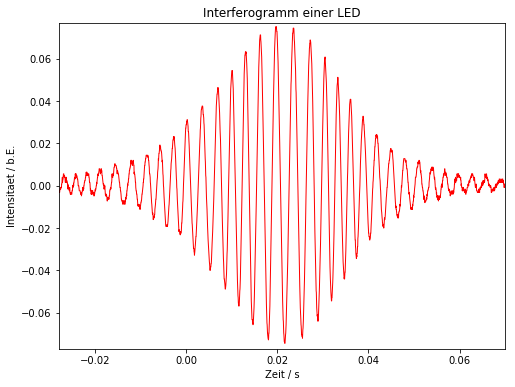

In [27]:
import numpy as np
import matplotlib.pyplot as plt
data_3 = np.genfromtxt ('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment232/F0013CH1.CSV', delimiter=",", skip_header=18)
t = data_3[:,3:4]
t = t[:, 0]
U = data_3[:,4:5]
U = U[:, 0]

plt.figure(figsize=(8,6))
plt.plot(t, U, color = 'red', linewidth = 1)
plt.xlabel('Zeit / s')
plt.ylabel('Intensitaet / b.E.')
plt.title('Interferogramm einer LED')
plt.axis([-0.028, 0.07, -0.077, 0.077])

[  51  116  181  249  331  429  510  578  657  726  809  896  975 1048
 1128 1214 1311 1407 1482 1553 1624 1693 1767 1850 1917 2003 2074 2141
 2220 2293 2369 2448]


[-0.028, 0.07, -0.077, 0.077]

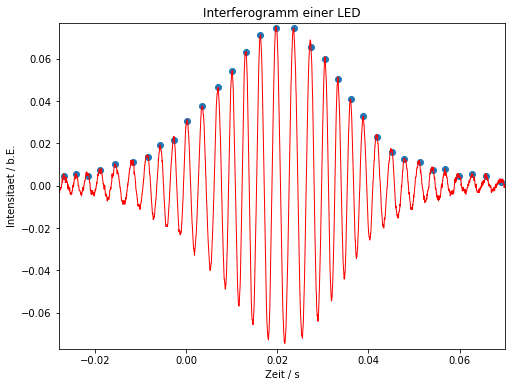

In [28]:
from scipy import signal
peakind = signal.find_peaks_cwt(U, np.arange(1,40), noise_perc=20)
print(peakind)

plt.figure(figsize=(8,6))
plt.plot(t[peakind], U[peakind], marker = 'o', linewidth = 0)
plt.plot(t, U, color = 'red', linewidth = 1)
plt.xlabel('Zeit / s')
plt.ylabel('Intensitaet / b.E.')
plt.title('Interferogramm einer LED')
plt.axis([-0.028, 0.07, -0.077, 0.077])

-0.0027680381451983408 0.020289676515707154 -0.015280226538494413


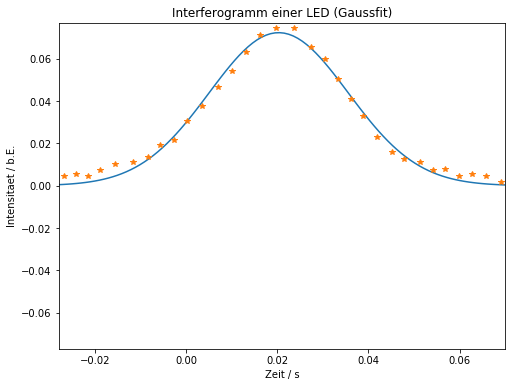

In [51]:
#Fitfunktion Gauss
def fitFunc(t, a, mu, sig):
  return a/np.sqrt(2*np.pi)/sig*np.exp(-(t-mu)**2/(2*sig**2))

from scipy.optimize import curve_fit
popt, pcov = curve_fit(fitFunc, t[peakind], U[peakind],maxfev = 850)

x = np.linspace(-0.028,0.07,100)
plt.figure(figsize=(8,6))
plt.plot(x, fitFunc(x, *popt))
plt.plot(t[peakind], U[peakind], marker = '*', linewidth = 0)
plt.xlabel('Zeit / s')
plt.ylabel('Intensitaet / b.E.')
plt.title('Interferogramm einer LED (Gaussfit)')
plt.axis([-0.028, 0.07, -0.077, 0.077])
print(*popt)